# Challenge 2

In this lab you will partner with another student to conduct **[pair programming](https://en.wikipedia.org/wiki/Pair_programming)**. In the next 60 minutes there will be 2 coding sessions of 30 minutes each. In each sessoin, one student will be the **driver** to write the code to solve the problem while the other student will be the **observer** to watch and review. There will be several iterations of your code because the observer will help the driver review the codes and make improvements until the 15 minute session ends. After the coding session ends, the driver and observer will switch roles.

#### Import all the libraries that are necessary

In [3]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [37]:
fitbit=pd.read_csv('Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [12]:
print(fitbit.columns)

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')


In [13]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
Date                          367 non-null object
Calorie burned                367 non-null int64
Steps                         367 non-null int64
Distance                      367 non-null float64
Floors                        367 non-null int64
Minutes Sedentary             367 non-null float64
Minutes Lightly Active        367 non-null int64
Minutes Fairly Active         367 non-null int64
Minutes Very Active           367 non-null int64
Activity Calories             367 non-null int64
MinutesOfSleep                367 non-null int64
MinutesOfBeingAwake           367 non-null int64
NumberOfAwakings              367 non-null int64
LengthOfRestInMinutes         367 non-null int64
Distance_miles                367 non-null float64
Days                          367 non-null object
Days_encoded                  367 non-null float64
Work_or_Weekend               367 non-null int64
Hou

## Coding Session I - 30 minutes

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**
1. **Is Fitbitter more active on weekend or workdays?**

##### All plots must be in the same jupyter notebook cell.

Hints:

- Use `Months_encoded` and `Week_or Weekend` columns
- Use `matplolib.pyplot` object oriented API
- Set your size figure to `12,4`
- Explore `plt.sca`
- Explore `plt.xticks`
- Save your figures

In [31]:
# Paso previo a agrupar. Conocer los valores únicos de la columna 'months encoded'. 
fitbit['Months_encoded'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4])

In [59]:
# Realizamos una agrupación por meses y la media del número de pasos. 
fitbit_month = fitbit.groupby(fitbit['Months_encoded']).agg({'Steps' : 'median'})
fitbit_month

,Steps
Months_encoded,
1,10366.0
2,9235.0
3,11122.0
4,13846.5
5,11998.0
6,12935.5
7,10644.0
8,12213.0
9,9343.0


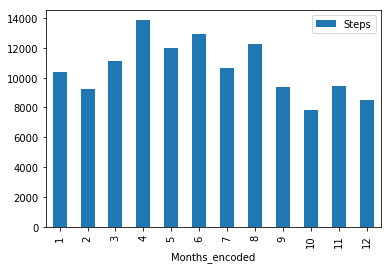

In [60]:
fitbit_month.plot(kind='bar')

In [41]:
# Paso previo a agrupar. Conocer los valores únicos de la columna 'months encoded'. 
fitbit['Work_or_Weekend'].unique()
# Sabemos que solo hay dos valores donde 1 es día laborable y 0 corresponde a los días del fin de semana. 

array([1, 0])

In [62]:
# Visualización de la media de pasos por mes
#(fig, ax) = plt.subplots(1,1, figsize=(12,4))
#x = fitbit['Months_encoded']
#y = fitbit['Steps']
#ax[0].plot(x,y)

#fig.plot(x, y, kind='bar')

In [98]:
# Agrupamos los días del finde semana y la media de minutos muy activos del día
fitbit_days = fitbit.groupby(fitbit['Work_or_Weekend']).agg({'Minutes Very Active':'median'})
fitbit_days

,Minutes Very Active
Work_or_Weekend,
0,19
1,30


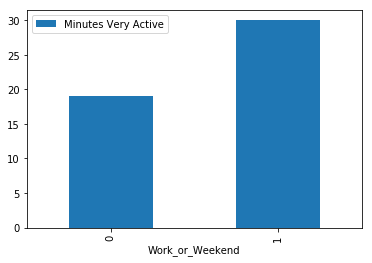

In [107]:
#Creamos el gráfico con los datos
fitbit_days.plot(kind='bar')

## Coding Session II - 30 minutes

**Write a loop to plot 3 scatter plots of the following features:**

1. **`Minutes Lightly Active`  vs `Steps`**
1. **`Minutes Very Active` vs `Steps`**
1. **`Minutes Sedentary` vs `Steps`**

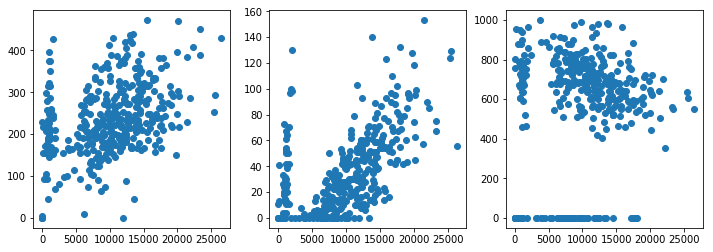

In [144]:
x = ['Steps']
y = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
fig, axes = plt.subplots(1,(len(y)), figsize=(12,4))
a = fitbit.iloc[:, 5:8]
for i in range(len(y)):
        axes[i].scatter(fitbit[x], fitbit[y[i]])
   